# Projet Numérique

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{matrix} \right.
$$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [234]:
import autograd
import autograd.numpy as np
import numpy


import matplotlib as mp
import matplotlib.pyplot as plt


<br>

## Question 1
Donner une interprétation physique à chaque terme de la dynamique. 
Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Que peut-on dire de leur stabilité à ce stade ?

#### Réponse
On a peut interpréter les termes des équations de Lotka-Volterra de la façon suivante:\
$\alpha$ correspond à la capacité reproductive des proies, indépendante des prédateurs\
$\beta$ représente la mortalité liée à la prédation, qui dépend du nombre de prédateurs \
$\gamma$ représente le taux de décès des prédateurs, indépendant des proies \
$\delta$ est la capacité reproductive des prédateurs, qui dépend du nombre de proies

On pose $f(x) = \begin{pmatrix} x_1(\alpha-\beta x_2) \\ -x_2(\gamma-\delta x_1)\end{pmatrix}$, et on cherche les zéros de $f$.

$f((x_1,x_2))=0 \iff \begin{pmatrix} x_1(\alpha-\beta x_2) \\ -x_2(\gamma-\delta x_1)\end{pmatrix} = \begin{pmatrix} 0 \\ 0\end{pmatrix}$

D'où les zéros de $f$ vérifient $\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} ou \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} \frac{\gamma}{\delta} \\ \frac{\alpha}{\beta} \end{pmatrix}$

Calculons la jacobienne de $f$ en ces deux points.

$J_f(x) = \begin{pmatrix} \alpha - \beta x_2 & -\beta x_1 \\ \delta x_2 & -(\gamma - \delta x_1)\end{pmatrix}$

On remarque que la jacobienne de $f$ est continue par rapport à $x$, donc $f$ est continûment différentiable.

Puis $J_f(0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma\end{pmatrix}$

D'après l'énoncé, $\alpha$ et $\gamma$ sont strictement positifs donc $J_f(0)$ possède une valeur propre $\alpha$ réelle strictement positive. D'où 0 est instable.

$J_f(\bar{x}) = \begin{pmatrix} 0 & -\frac{\beta\gamma}{\delta} \\ \frac{\alpha\delta}{\beta} & 0\end{pmatrix}$

$\chi_{J_f(\bar{x})}(x) = x^2 + \alpha\gamma =(x+i\alpha\gamma)(x-i\alpha\gamma)$

Les valeurs propres du linéarisé tangeant en $\bar{x}$ sont imaginaires pures, on ne peut donc pas conclure directement sur la stabilité de ce point.

<br>

## Question 2
À l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
Intuiter le comportement des solutions. 
On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

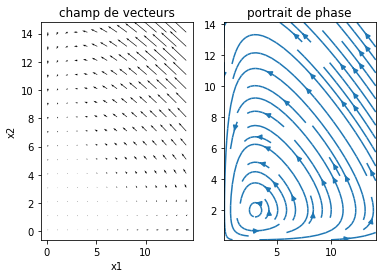

In [294]:
a = 2
b = 1
c = 3
d = 1
xini= np.array([[2.0,2.0]])


def fini(x,y):
    return (x*(a-b*y), -y*(c-d*x))


ax1 = plt.subplot(1,2,1)                         #séparer l'ecran en 1 ligne et 2 colonnes
ax1.set_title("champ de vecteurs")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
Fini = np.vectorize(fini)
x, y = np.arange(0.1, 15, 1), np.arange(0.1, 15 , 1)
U, V = np.meshgrid(x,y)
X, Y = Fini(U,V)
ax1.quiver(U,V,X,Y)

ax2 = plt.subplot(1,2,2)                         #séparer l'ecran en 1 ligne et 2 colonnes
ax2.set_title("portrait de phase")
ax2.streamplot(U,V,X,Y, density = 0.6)
plt.show()







<br>

## Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition.

#### Réponse
Comme nous l'avons vu à la question 1, $f$ est continûment différentiable par rapport à $x$. Ainsi par le théorème de Cauchy-Lipschitz, pour tout couple $(t_0,x_0) \in \mathbb{R}\times(\mathbb{R}_{>0})^2$, il existe une unique solution maximale $x$. \
On a donc de manière immédiate que deux solutions maximales qui sont égales en un point sont égales en tout point de leur ensemble de définition. \
Cherchons alors des solutions qui restent sur les axes du repère afin de montrer qu'une solution initialisée dans $(\mathbb{R}_{>0})^2$ ne peut pas en sortir. \
On souhaite avoir une solution $x$ vérifiant $x(t) = (0,x_2(t))$ sur son ensemble de définition, avec $x(t_0) = (0, x_{20})$\
On suppose qu'une telle solution existe.\
Alors $\dot{x_1}(t) = 0$ et $\dot{x_2}(t) = -\gamma x_2(t)$ \
Donc $\exists\lambda\in\mathbb{R}, x_2(t) = \lambda e^{-\gamma t}$ \
La condition initiale donne $x_2(t) = x_{20}e^{-\gamma(t-t_0)}$

On vérifie ensuite que la forme trouvée est bien solution des équations de Lotka-Volterra.
On pose $x_{20},t_0$ comme définis précédemment et $x(t)=\begin{pmatrix} 0 \\ x_{20}e^{-\gamma(t-t_0)}\end{pmatrix}$ \
Alors on obtient de manière immédiate que $x$ vérifie le système d'équations et la condition initiale. \
La solution n'explose pas en temps fini et reste dans l'ensemble de définition de $f$ (tout le plan) donc la solution est définie sur $\mathbb{R}$. \
Ainsi, on voit bien que, selon le choix de $x_{20}$, on peut trouver une solution qui parcourt $\{0\} \times\mathbb{R}_{>0}$ ou $\{0\} \times\mathbb{R}_{<0}$. Par symétrie visible entre $x_1$ et $x_2$, on peut faire le même raisonnement en bloquant $x_2$ à $0$. On peut alors trouver des solutions qui balaient $\mathbb{R}_{>0} \times\{0\}$ ou $\mathbb{R}_{<0} \times\{0\}$. Enfin, la solution triviale $x = 0_{\mathbb{R^2}}$ occupe l'origine.

Il est donc impossible de traverser les axes du repère sans coïncider avec une solution maximale qui n'en sort pas, ce qui entraîne que toute solution initialisée dans $(\mathbb{R}_{>0})^2$ ne peut qu'y rester.

<br>

## Question 4
On considère la fonction
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$
définie sur $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.
Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$.

#### Réponse
$(H\circ x)' = \delta\dot{x_1} - \gamma\frac{\dot{x_1}}{x_1} + \beta\dot{x_2} - \alpha\frac{\dot{x_2}}{x_2}$ \
On remplace $\dot x_1$ et $\dot x_2$ à l'aide du système d'équations.\
$(H\circ x)' = \delta x_1(\alpha-\beta x_2) - \gamma(\alpha-\beta x_2) - \beta x_2(\gamma-\delta x_1) + \alpha(\gamma-\delta x_1) = 0$ \
Ainsi la fonction $H$ reste constante le long des solutions intialisées dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

<br>

## Question 5
Représenter les courbes de niveau de $H$. Qu'en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$
est stable, au sens de la définition de stabilité.

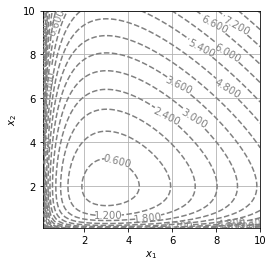

In [295]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.show()

def Hini (x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

display_contour(Hini, x=np.linspace(0.1, 10.0, 100), y=np.linspace(0.1, 10.0, 100), levels=20)

<br>

## Question 6
Coder une fonction du type :

In [296]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    T = np.arange(t0, tf, dt)
    X = np.zeros((len(T),np.shape(x0)[1]))
    X[0] = x0
    for i in range (0,len(T)-1):
        X[i+1] = X[i]+ dt*np.array([f(T[i],X[i])])
    X = X.reshape(len(T),np.shape(x0)[1])
    return (T,X)


prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

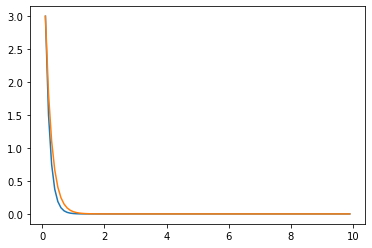

In [297]:
def f_6(t,x):
    return -5*x


t0 = 0.1
tf = 10
x0 = np.array([[3.0]])
dt = 0.1

T, X = solve_euler_explicit(f_6,x0, dt, t0, tf)
Y = x0[0]*np.exp(-5*(T-t0))

plt.plot(T, X)
plt.plot(T, Y)
plt.show()


Exemple 1: $y' = -5y,    y=e^{-5x}$

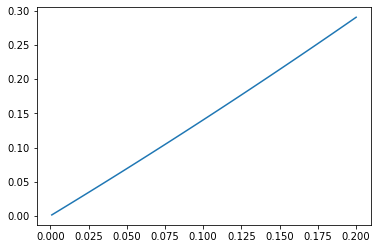

In [298]:
dt = np.linspace(0.001,0.2,100)
t0 = 1
res = []
for t in dt:
    res.append(abs(np.exp(t0+t)-np.exp(t0)*(1+t))/t)  # on calcule l'erreur générée en une étape pour différents pas de temps

plt.plot(dt,res)
plt.show()

Exemple 2: $y' = y^2, y=-\frac{1}{x}$

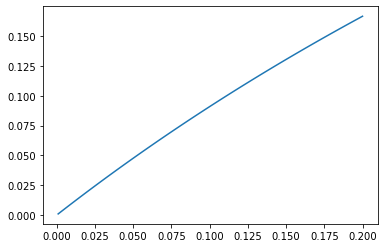

In [299]:
dt = np.linspace(0.001,0.2,100)
t0 = 1
res = []
for t in dt:
    res.append(abs(-1/(t0+t)+1/t0*(1-t/t0))/t)
    
plt.plot(dt,res)
plt.show()

<br>

## Question 7
Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.
Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ?
On pourra tracer l'évolution de la fonction $H$.

<br>

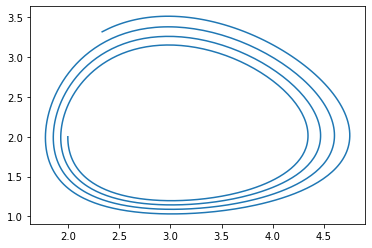

In [300]:
def f(T,X):
    x1, y1 = X[0], X[1]
    return (x1*(a-b*y1), -y1*(c-d*x1))
T, X = solve_euler_explicit(f, xini, 0.01, 0, 10.)
plt.plot(X[:,0], X[:,1])
plt.show()

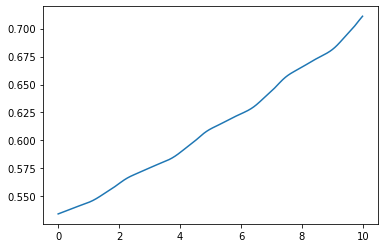

In [301]:
def Hi(T, X):
    x1, x2 = X[:,0], X[:,1]
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

Y = Hi(T, X)
plt.plot(T, Y)
plt.show()


## Question 8
Coder maintenant une fonction du type :

In [302]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    T = np.arange(t0,tf,dt)
    X = x0
    for i in range (0,len(T)-1):
        x = X[i] + dt*np.array(f(T[i],X[i]))
        j = 0
        while j < itermax:
            x = X[i] + dt*np.array(f(T[i],x))
            j+=1
        X = np.concatenate((X, [x]))
    X = X.reshape(len(T),np.shape(x0)[1])
    return T, X

donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

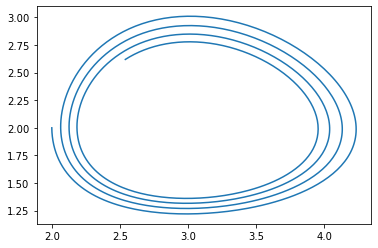

In [303]:
T, X = solve_euler_implicit(f, xini, 0.01, 0, 10.)
plt.plot(X[:,0], X[:,1])
plt.show()

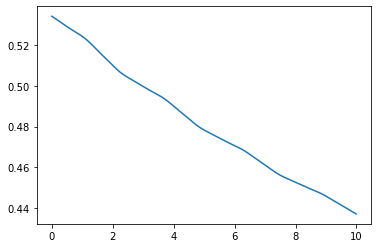

In [304]:
Y = Hi(T, X)
plt.plot(T, Y)
plt.show()

On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

<br>

## Question 9
Expliquer pourquoi les solutions de
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{matrix} \right.
$$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$.

#### Réponse
On considère une solution des équations de Lotka-Volterra, on veut montrer qu'elle vérifie le système d'équations proposé. Soit $u:\mathbb{R^2}\mapsto\mathbb{R^2}$ continûment différentiable.

On veut montrer que $\dot x_1 = x_1(\alpha-\beta x_2) = x_1(\alpha-\beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)$, ce qui revient à montrer que $H(x_1,x_2)$ est constant égal à $H_0$.

Etudions donc $(H\circ x)'=\delta\dot{x_1} - \gamma\frac{\dot{x_1}}{x_1} + \beta\dot{x_2} - \alpha\frac{\dot{x_2}}{x_2}$
Or $x$ est solution des équations de Lotka-Volterra, d'où en remplaçant $\dot x_1$ et $\dot x_2$ par leurs valeurs: \
$(H\circ x)'=\delta x_1(\alpha-\beta x_2) - \gamma(\alpha - \beta x_2) - \beta x_2(\gamma-\delta x_1)+\alpha(\gamma-\delta x_1) = 0$

Donc $H(x_1,x_2)$ est constant le long des solutions et vaut $H_0$ en $t=0$.

D'où la quantité étudiée reste nulle, ainsi la solution vérifié le deuxième système d'équations.

A l'inverse, si on considère une solution du deuxième système d'équations, celui-ci est vérifié pour tout $u$ continûment différentiable, donc à forciori pour la fonction nulle. On se ramène ainsi aux équations de Lotka-Volterra.

<br>

## Question 10
Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que
$$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$$ 
En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

#### Réponse
Soit $u$ continûment différentiable. \
$\frac{d}{dt}(H(x(t)-H_0) = ((\frac{\gamma}{x_1}-\delta) u_1(x_1,x_2) + (\frac{\alpha}{x_2}-\beta)u_2(x_1,x_2))(H(x_1,x_2)-H_0)$ \
Or $\nabla H(x_1,x_2)= \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}$ donc $||\nabla H(x_1,x_2)||^2 = (\delta - \frac{\gamma}{x_1})^2+(\beta - \frac{\alpha}{x_2})^2$

Ainsi, en posant $\boxed{u(x_1,x_2) = k \nabla H(x_1,x_2)}$, on a: \
$\frac{d}{dt}(H(x(t)-H_0) = -k||\nabla H(x(t))||^2(H(x(t))-H_0)$

Soit $c>0$ tel que $||x(t)-\bar{x}||\ge c$. \
$\nabla H(x_1,x_2)=\begin{pmatrix} \frac{1}{x_1}(\delta x_1 - \gamma) \\ \frac{1}{x_2}(\beta x_2 - \alpha) \end{pmatrix} = \frac{1}{x_1x_2}\begin{pmatrix} (\delta x_1 - \gamma) \\ (\beta x_2 - \alpha) \end{pmatrix} =\frac{1}{x_1x_2}\begin{pmatrix} -f_2(x) \\ f_1(x) \end{pmatrix}$ \
Ainsi les zéros du gradient de $H$ coïncident avec ceux de $f$. Or $x$ ne s'annule pas d'après la question $3$ et reste à une distance $c$>0 de $\bar{x}$ d'après l'énoncé, ainsi $\nabla H(x_1,x_2)$ ne s'annule pas. \
D'où $\exists c'>0$ tel que $||\nabla H(x_1,x_2)|| \ge c' >0$ \
Ainsi $\boxed{\frac{d}{dt}(H(x(t))-H_0) \le -kc'^2(H(x(t))-H_0)}$ 

<br>

## Question 11
En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

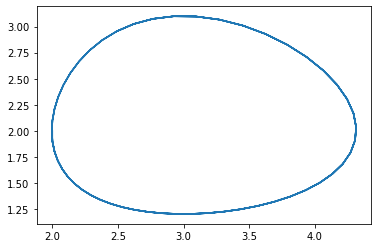

In [305]:
k = 100.0
xini2= np.array([[2.0,2.0]])


def H(T, X):
    x1, x2 = X[0], X[1]
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

def u(X):
    x1, x2 = X[0], X[1]
    return k*np.array([d-(c/x1), b-(a/x2)])
    

def F(T, X):
    x1, x2 = X[0], X[1]
    return (x1*(a - b*x2) - u(X)[0]*(H(T, X) - H(0., np.array([2.0,2.0]))), -x2*(c - d*x1) - u(X)[1]*(H(T, X) - H(0., np.array([2.0,2.0]))))
 


T, X = solve_euler_explicit(F, xini2, 0.05, 0, 10.)
plt.plot(X[:,0], X[:,1])
plt.show()

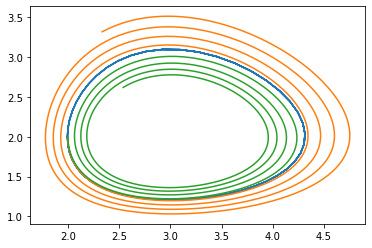

In [308]:
T, X = solve_euler_explicit(F, xini2, 0.05, 0, 10.)
plt.plot(X[:,0], X[:,1])
T, Y = solve_euler_explicit(f, xini, 0.01, 0, 10.)
plt.plot(Y[:,0], Y[:,1])
T, Z = solve_euler_implicit(f, xini, 0.01, 0, 10.)
plt.plot(Z[:,0], Z[:,1])
plt.show()